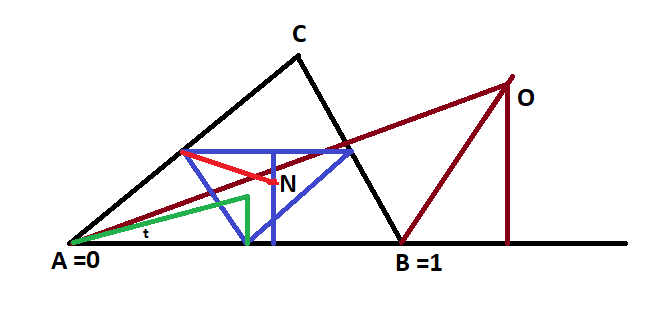

In [2]:
from IPython.display import Image
Image(filename=r"Nine Point Circle 4.png")

$\textbf{Feuerbach Theorem}$. The nine-point-circle is tangent to the out-circle.

Put $\Delta ABC$ in a coordinate system, so that $A$ is at the origin, $B$ is on $x$-coordinate. Set $AB=1$. Let $O$ be the center of the out-ciricle, which is the intersection of the bisection lines of angle $A$ and the complement of angle $B$. Let $N$ be the center of the nine-point-circle.

From $x_O\tan(A/2)=(x_O-1)\tan((\pi-B)/2)$, we get
$$x_O=\frac{1}{1-\tan\frac{A}{2}\tan\frac{B}{2}}, y_O=x_O \tan\frac{A}{2}, r_O=y_O$$

From $x_C\tan A=(1-x_C)\tan B$, we get
$$x_C=\frac{\tan B}{\tan A+\tan B}, y_C=x_C \tan A$$

In the picture, the green triangle is the triangle connecting from the center of the circumcirle to $A$ and the center of $AB$. The position of the center $N$ of the nine-point-circle relative to the *half triangle* is the same as the position of the center of the circumcirle relative to the triangle $\Delta ABC$. So we have
$$x_N=\frac{1}{4}+\frac{1}{2}x_C, y_N=\frac{1}{2}y_C-\frac{1}{4}\tan t, r_N=\frac{1}{4}\frac{1}{\cos t}=\frac{1}{4}\sqrt{1+\tan^2t}$$
where $t$ is the angle shown in the picture and can be calculated as follow:
$$\frac{x_C}{2}\frac{1}{\cos A}\frac{1}{\cos(A-t)}=\frac{1}{2}\frac{1}{\cos t}$$
We get
$$\tan t=\frac{x_C-\cos^2A}{\sin A \cos A}$$

Our goal is to show
$$\textrm{distance}^2=(x_O-x_N)^2+(y_O-y_N)^2=(r_O+r_N)^2$$
Notice that all of the expressions are in terms of $\tan(A/2)$ and $\tan(B/2)$. So we let
$$x=\tan\frac{A}{2}, y=\tan\frac{B}{2}$$
and hope to express all expressions as rational functions, that is, polynomial over polynomial, and from there we can use computer algebra to prove polynomial identities. It's easy to see that
$$\sin\frac{A}{2}=\frac{x}{\sqrt{1+x^2}},\cos\frac{A}{2}=\frac{1}{\sqrt{1+x^2}},
\sin A=\frac{2x}{1+x^2},\cos A=\frac{1-x^2}{1+x^2},\tan A=\frac{2x}{1-x^2}$$
The trignometic functions of $B$ and $B/2$ are similar. Notice that with these formula, $x_O,y_O,r_O,x_N,y_N$ are indeed rational functions in $x$ and $y$. The only obstacle is the expression of $r_N$. But, with a little help of computer algebra, we can show that
$$\sqrt{1+\tan^2t}=\frac{(1+x^2)(1+y^2)}{2x(1-y^2)+2y(1-x^2)}$$

The following Python Sympy program shows that the theorem holds.

In [1]:
from sympy import *
import math

x, y= symbols("x y")
xc1=y*(1-x**2)
xc2=x*(1-y**2)+y*(1-x**2)
xc=xc1/xc2
yc1=2*x*y
yc2=xc2
yc=yc1/yc2
xo1=1
xo2=1-x*y
xo=xo1/xo2
yo1=x
yo2=xo2
yo=yo1/yo2
ro=yo

tn1=y*(1+x**2)**2-(1-x**2)*(x*(1-y**2)+y*(1-x**2))
tn2=2*x**2*(1-y**2)+2*x*y*(1-x**2)
#tann=xc*(1+x**2)**2/2/x/(1-x**2)-(1-x**2)/2/x
tn=tn1/tn2
#xn=1/4+xc/2
xn1=xc2+2*xc1
xn2=4*xc2
xn=xn1/xn2
#yn=yc/2-tn/4
yn1=2*yc1*tn2-yc2*tn1
yn2=4*yc2*tn2
yn=yn1/yn2
#rn=sqrt(1+tn**2)/4
rn1=x*(1+x**2)*(1+y**2)
rn2=4*tn2
rn=rn1/rn2
#lhs=(xo-xn)**2+(yo-yn)**2
#rhs=(ro+rn)**2
lhs1=(xo1*xn2-xo2*xn1)**2*(yo2*yn2)**2
lhs2=(yo1*yn2-yo2*yn1)**2*(xo2*xn2)**2
lhs3=(yo2*rn2)**2
lhs=(lhs1+lhs2)*lhs3
rhs1=(yo1*rn2+yo2*rn1)**2
rhs2=(xo2*xn2*yo2*yn2)**2
rhs=rhs1*rhs2

subs={x:math.tan(math.pi*35/180), y:math.tan(math.pi*30/180)}
print(lhs.evalf(subs=subs))
print(rhs.evalf(subs=subs))
print(expand(lhs)==expand(rhs))
print(expand(lhs))


178.793854903564
178.793854903564
True
1024*x**26*y**16 + 18432*x**26*y**14 + 82944*x**26*y**12 + 6144*x**25*y**17 + 114688*x**25*y**15 + 423936*x**25*y**13 - 995328*x**25*y**11 + 15360*x**24*y**18 + 303104*x**24*y**16 + 758784*x**24*y**14 - 6506496*x**24*y**12 + 5474304*x**24*y**10 + 20480*x**23*y**19 + 442368*x**23*y**17 + 286720*x**23*y**15 - 18296832*x**23*y**13 + 38301696*x**23*y**11 - 18247680*x**23*y**9 + 15360*x**22*y**20 + 389120*x**22*y**18 - 923648*x**22*y**16 - 28942336*x**22*y**14 + 117233664*x**22*y**12 - 131586048*x**22*y**10 + 41057280*x**22*y**8 + 6144*x**21*y**21 + 212992*x**21*y**19 - 1585152*x**21*y**17 - 28385280*x**21*y**15 + 206233600*x**21*y**13 - 416870400*x**21*y**11 + 300681216*x**21*y**9 - 65691648*x**21*y**7 + 1024*x**20*y**22 + 73728*x**20*y**20 - 1153024*x**20*y**18 - 18149376*x**20*y**16 + 230694912*x**20*y**14 - 762241024*x**20*y**12 + 968895488*x**20*y**10 - 484780032*x**20*y**8 + 76640256*x**20*y**6 + 16384*x**19*y**21 - 434176*x**19*y**19 - 7970816*x